# Parte 2: Automatización y Entorno (60 %)

# Configuración de directorio

Utilizaremos las carpetas creadas en el Taller 1 para guardar todo el taller

In [1]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# en caso de no tener las dependencias instaladas:

dependencias = ["os", "pandas", "random",
                "numpy", "matplotlib.pyplot"]

import sys
import subprocess

# Bucle para instalar cada librería
for dep in dependencias:
    subprocess.check_call([sys.executable, "-m", "pip", "install", dep])

Relative path:

In [20]:
relative_path = os.getcwd()

In [21]:
relative_path

'c:\\Users\\SEBASTIAN\\Documents\\GitHub\\taller4-GPI\\proyecto'

Automatización de la creación del directorio de trabajo

In [ ]:
def crear_estructura(relative_path):
    # Estructura de carpetas del proyecto
    estructura = [
        "proyecto/data/raw",
        "proyecto/data/processed",
        "proyecto/src",
        "proyecto/scripts",
        "proyecto/results/figures",
        "proyecto/results/tables"
    ]

    # Archivos a crear en el proyecto
    archivos = [
        "proyecto/environment.yml",
        "proyecto/runall.sh",
        "proyecto/README.md"
    ]

    # Crear carpetas de la estructura
    for path in estructura:
        ruta_completa = os.path.join(relative_path, path)
        os.makedirs(ruta_completa, exist_ok=True)

    # Crear archivos vacíos en las rutas especificadas
    for archivo in archivos:
        ruta_archivo = os.path.join(relative_path, archivo)
        with open(ruta_archivo, 'w') as f:
            pass  # Crear archivo vacío

In [7]:
crear_estructura(relative_path)

## Simulación de datos

In [23]:
# Cambio de directorio para guardar archivo de simulación
# no pude hacerlo con magic commands
os.chdir(os.path.join(relative_path, "proyecto"))

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Users\\SEBASTIAN\\Documents\\GitHub\\taller4-GPI\\proyecto\\proyecto'

In [22]:
%%writefile simulated_data.py

# Importar librerias
import pandas as pd
import random
import numpy as np

# Semillas para asegurar replicabilidad
random.seed(123)
np.random.seed(123)

# Simulación de universidades y revistas
universidades = ["Universidad Nacional Autónoma de México", "Universidad de Buenos Aires",
                 "Universidade de São Paulo", "Pontificia Universidad Católica de Chile",
                 "Universidad de los Andes"]
revistas = ["Nature", "Science", "PLoS ONE", "Documentos CEDE", "Journal of Open Science"]

# Simulación de datos
num_registros = 100
datos = []

for i in range(num_registros):
    id_articulo = i + 1
    # Agregar 5% de valores nulos
    titulo = f"Estudio sobre la ciencia abierta {i}" if random.random() > 0.05 else np.nan
    afiliacion = random.choice(universidades)
    # Errores ortograficos
    pais = random.choice(["México", "Argentina", "Brazil", "Chile", "Colombia", "Peru", "Brasil"
                          , "Argentna"])
    # Datos inconsistentes
    anio_publicacion = random.choice([2020, 2021, "2022", "20XX", 2023])
    revista = random.choice(revistas)
    # Valores negativos (fuera de rango)
    factor_impacto = round(random.uniform(-2, 15), 2)
    # Valores inconsistentes
    citas = random.choice([random.randint(0, 500), "cien", np.nan])
    
    datos.append([id_articulo, titulo, afiliacion, pais, anio_publicacion, revista,
                  factor_impacto, citas])

# Crear DataFrame
df = pd.DataFrame(datos, columns=["ID", "Título", "Afiliación", "País", "Año de publicación",
                                  "Revista", "Factor de impacto", "Citas"])

# Guardar datos
ruta  = r'c:\\Users\\SEBASTIAN\\Documents\\GitHub\\taller4-GPI\\proyecto'
ruta_guardado = os.path.join(ruta, "data", "raw", "simulated_data.csv")
df.to_csv(ruta_guardado, index = False)

Overwriting simulated_data.py


In [16]:
print(relative_path)

c:\Users\SEBASTIAN\Documents\GitHub\taller4-GPI\proyecto


Crear rutina de limpieza de datos automatizada

In [10]:
# Correr el archivo para crear la base simulada
%run simulated_data.py

In [11]:
datos = pd.read_csv(ruta + "\datos\simulated_data.csv", encoding = "utf-8-sig")
datos

,Unnamed: 0,ID,Título,Afiliación,País,Año de publicación,Revista,Factor de impacto,Citas
0,0,1,Estudio sobre la ciencia abierta 0,Universidad Nacional Autónoma de México,Brasil,2022,Nature,12.25,447
1,1,2,Estudio sobre la ciencia abierta 1,Universidad de los Andes,Peru,2022,Nature,0.71,NaN
2,2,3,Estudio sobre la ciencia abierta 2,Universidad de Buenos Aires,Brazil,2020,Documentos CEDE,11.15,NaN
3,3,4,Estudio sobre la ciencia abierta 3,Universidad Nacional Autónoma de México,Peru,20XX,Nature,13.39,NaN
4,4,5,Estudio sobre la ciencia abierta 4,Universidad Nacional Autónoma de México,Colombia,20XX,Journal of Open Science,6.11,240
...,...,...,...,...,...,...,...,...,...
95,95,96,Estudio sobre la ciencia abierta 95,Universidad de Buenos Aires,Colombia,2022,Journal of Open Science,3.28,cien
96,96,97,Estudio sobre la ciencia abierta 96,Universidad Nacional Autónoma de México,Argentina,2023,Science,14.61,NaN
97,97,98,Estudio sobre la ciencia abierta 97,Pontificia Universidad Católica de Chile,Brasil,20XX,Nature,11.58,cien
98,98,99,Estudio sobre la ciencia abierta 98,Pontificia Universidad Católica de Chile,Argentna,2020,Documentos CEDE,-0.75,cien


In [87]:
# Cambio de directorio para guardar archivo de simulación
# no pude hacerlo con magic commands
os.chdir(ruta + r'\codigo')

In [88]:
%%writefile data_cleaning.py

# Importar librerias
import pandas as pd
import numpy as np

# Definir ruta de trabajo
ruta = r'C:\Users\SEBASTIAN\OneDrive - Universidad de los andes\Universidad\Maestria\2025-1\Ciencia Abierta\proyecto_investigacion'

# Cargar datos
datos = pd.read_csv(ruta + "\datos\simulated_data.csv", encoding = "utf-8-sig")

# Eliminar posibles duplicados
datos = datos.drop_duplicates()

# Corregir errores ortograficos
datos["País"] = datos["País"].replace({"Argentna": "Argentina",
                                       "Brazil": "Brasil"})

# Limpiar la variable años
def limpiar_anio(valor):
    try:
        return int(valor)
    except:
        return np.nan

datos["Año de publicación"] = datos["Año de publicación"].apply(limpiar_anio)

# Limpiar citas
def limpiar_citas(valor):
    if isinstance(valor, str):
        return np.nan if not valor.isdigit() else int(valor)
    return valor

datos["Citas"] = datos["Citas"].apply(limpiar_citas)

# Reemplazar valores fuera de rango
datos["Factor de impacto"] = datos["Factor de impacto"].apply(lambda x: x if x >= 0 else np.nan)

# Eliminar missing values
datos = datos.dropna(subset=["Título", "Año de publicación", "Citas",
                       "Factor de impacto"])

# Guardar datos limpios
datos.to_csv(ruta + "\datos\clear_data.csv", index = False, encoding = "utf-8-sig")

Overwriting data_cleaning.py


In [89]:
# Correr el script para guardar los datos limpios
%run data_cleaning.py

Generar graficas

In [90]:
# Cambio de directorio para guardar archivo de simulación
# no pude hacerlo con magic commands
os.chdir(ruta + r'\codigo')

In [91]:
%%writefile graphs.py

import matplotlib.pyplot as plt
import pandas as pd

# Definir ruta de trabajo
ruta = r'C:\Users\SEBASTIAN\OneDrive - Universidad de los andes\Universidad\Maestria\2025-1\Ciencia Abierta\proyecto_investigacion'

data = pd.read_csv(ruta + "\datos\clear_data.csv", encoding = "utf-8-sig")

fig, ax = plt.subplots()
ax.scatter(data['Citas'], data['Factor de impacto'])
ax.set_title('Relación Factor de impacto y citas')
ax.set_xlabel('Citas')
ax.set_ylabel('Factor de impacto')
plt.show()
fig.savefig(ruta + r'\documentos\figure1.pdf')

Overwriting graphs.py


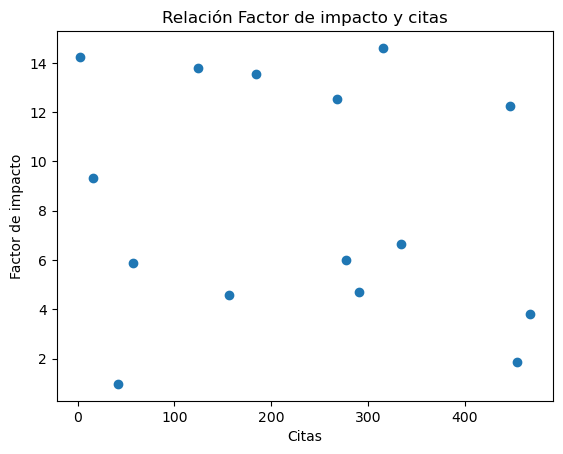

In [92]:
%run graphs.py